# Importing all required Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Loading the Iris Dataset

In [2]:
df=sns.load_dataset("iris") 

# Showing the Dataset(head/tail)

In [4]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Performing Exploratory Data Analysis

In [6]:
df.describe() #describe the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [46]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Performing Data Visualization

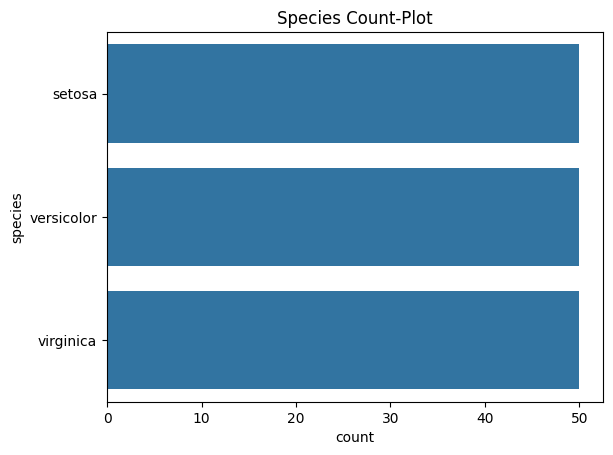

In [45]:
sns.countplot(df['species'])
plt.title('Species Count-Plot')
plt.show()

#PIE CHART

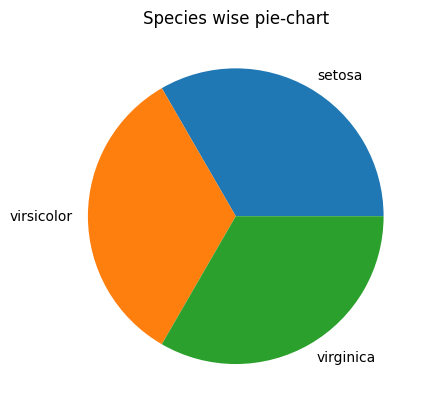

In [48]:
plt.pie(df['species'].value_counts(),labels=['setosa','virsicolor','virginica'])
plt.title('Species wise pie-chart')
plt.show()

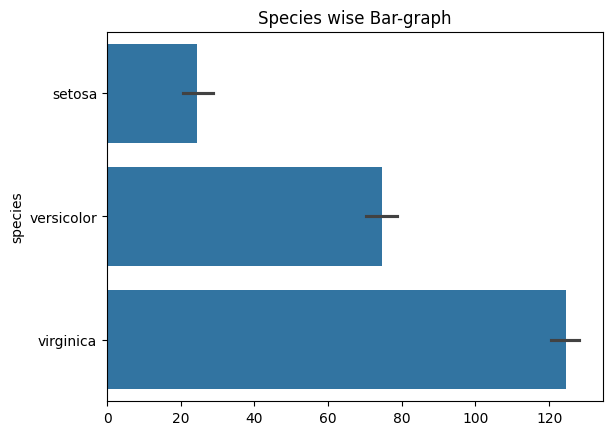

In [49]:
sns.barplot(df['species'])
plt.title('Species wise Bar-graph')
plt.show()

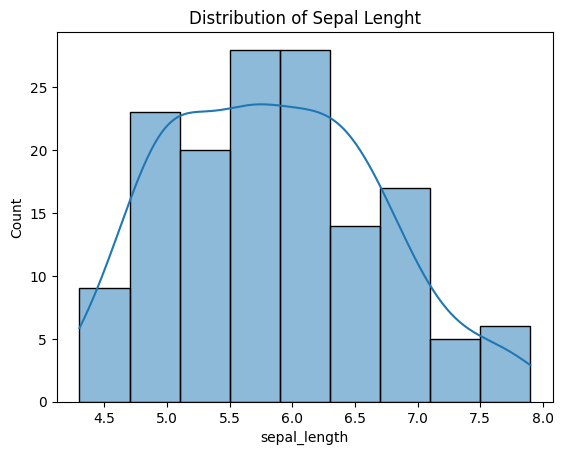

In [51]:
sns.histplot(df["sepal_length"],kde=True)
plt.title('Distribution of Sepal Lenght')
plt.show()

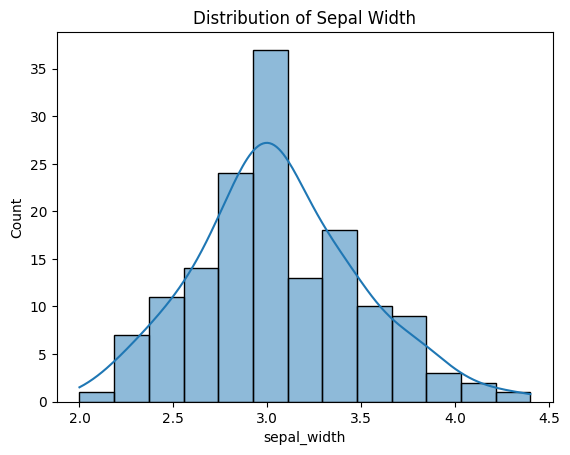

In [52]:
sns.histplot(df["sepal_width"],kde=True)
plt.title('Distribution of Sepal Width')
plt.show()

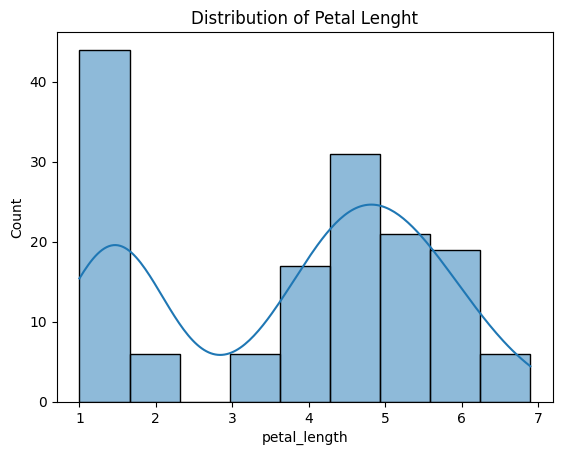

In [53]:
sns.histplot(df["petal_length"],kde=True)
plt.title('Distribution of Petal Lenght')
plt.show()

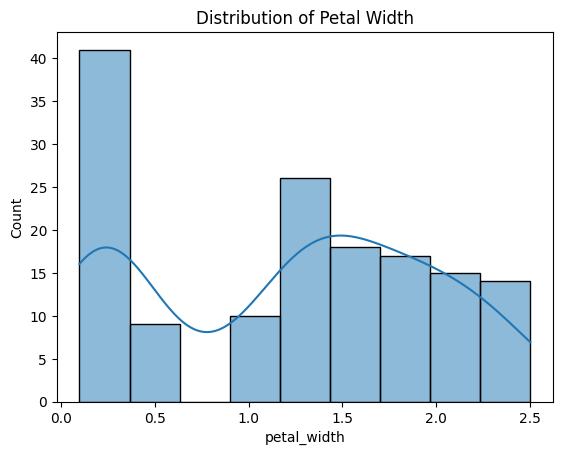

In [54]:
sns.histplot(df["petal_width"],kde=True)
plt.title('Distribution of Petal Width')
plt.show()

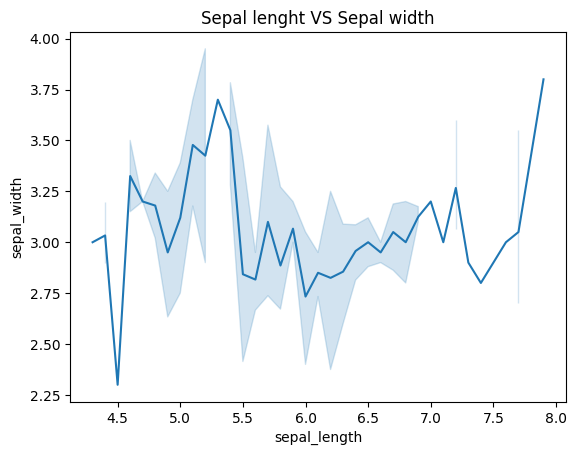

In [55]:
sns.lineplot(x='sepal_length',y='sepal_width',data= df)
plt.title('Sepal lenght VS Sepal width')
plt.show()

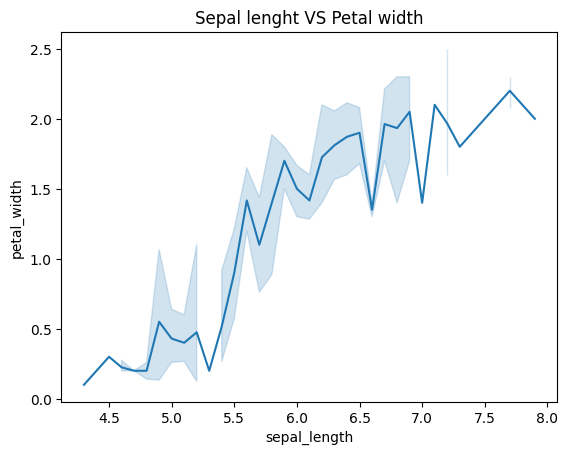

In [59]:
sns.lineplot(x='sepal_length',y='petal_width',data= df)
plt.title('Sepal lenght VS Petal width')
plt.show()

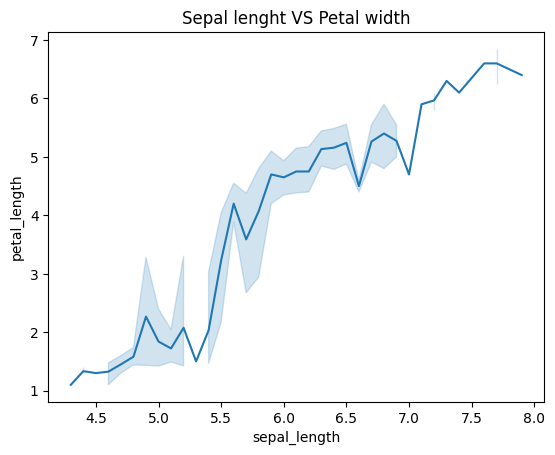

In [57]:
sns.lineplot(x='sepal_length',y='petal_length',data= df)
plt.title('Sepal lenght VS Petal width')
plt.show()

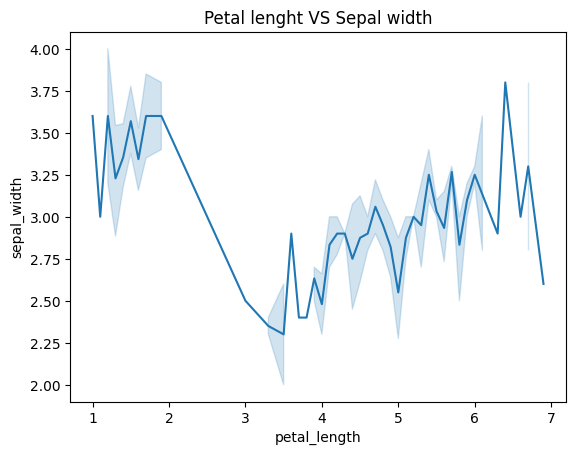

In [58]:
sns.lineplot(x='petal_length',y='sepal_width',data= df)
plt.title('Petal lenght VS Sepal width')
plt.show()

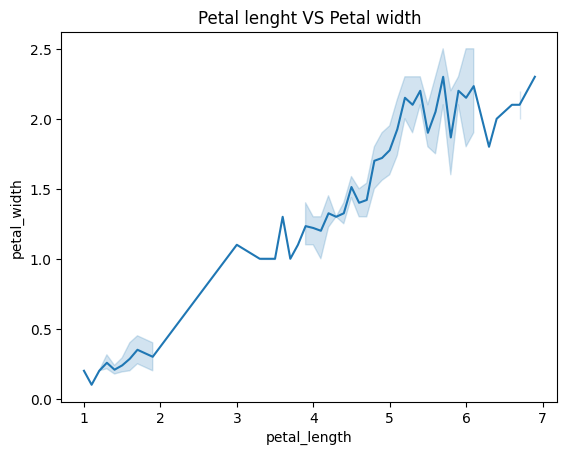

In [60]:
sns.lineplot(x='petal_length',y='petal_width',data= df)
plt.title('Petal lenght VS Petal width')
plt.show()

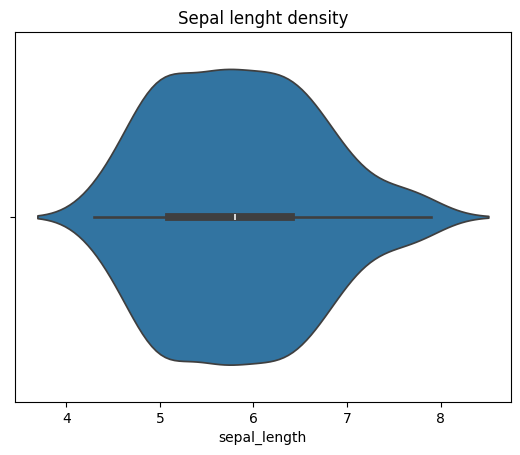

In [61]:
sns.violinplot(x=df["sepal_length"])
plt.title('Sepal lenght density')
plt.show()

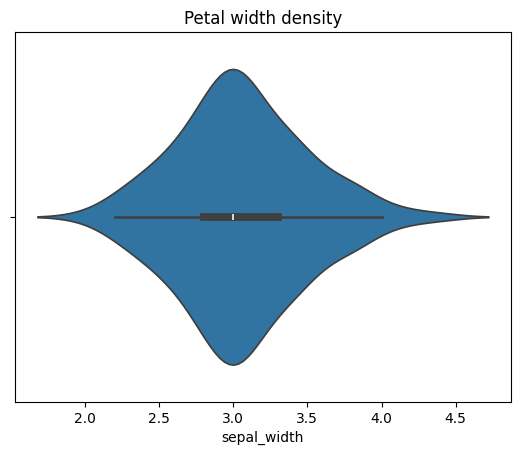

In [62]:
sns.violinplot(x=df["sepal_width"])
plt.title('Petal width density')
plt.show()

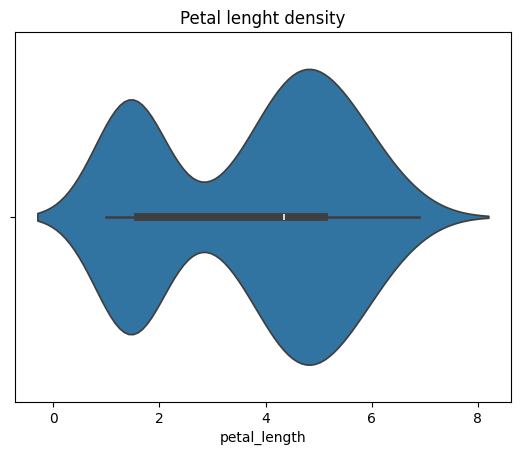

In [63]:
sns.violinplot(x=df["petal_length"])
plt.title('Petal lenght density')
plt.show()

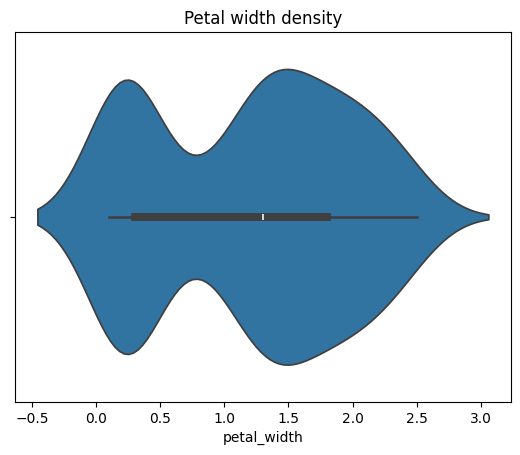

In [64]:
sns.violinplot(x=df["petal_width"])
plt.title('Petal width density')
plt.show()

#PAIR PLOT

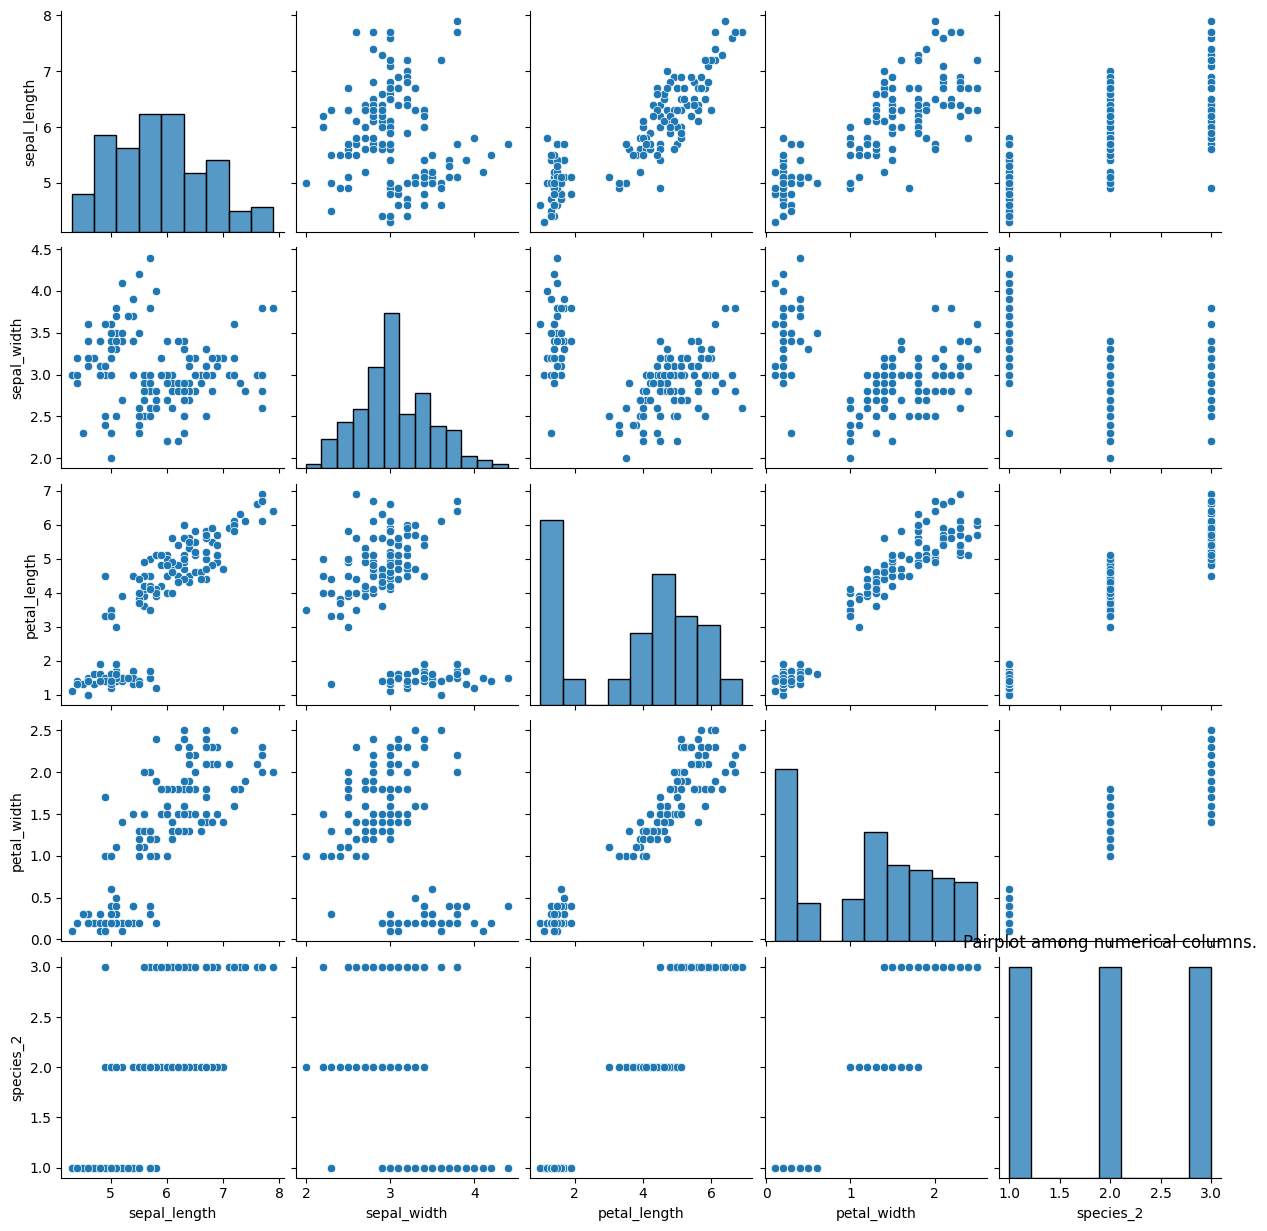

In [66]:
sns.pairplot(df)
plt.title('Pairplot among numerical columns.')
plt.show()

# Perfoming Encoding for Categorical Column.

In [29]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [30]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [31]:
# encoding
species_2=[]
for i in df['species']:
    if i=='setosa':
       species_2.append(1)
    elif i=='versicolor':
        species_2.append(2)
    else:
        species_2.append(3)

df["species_2"] =species_2

In [32]:
df.head(60)

,sepal_length,sepal_width,petal_length,petal_width,species,species_2
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
8,4.4,2.9,1.4,0.2,setosa,1
9,4.9,3.1,1.5,0.1,setosa,1


In [33]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_2
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3
149,5.9,3.0,5.1,1.8,virginica,3


# Preparing for Multilinear regression model training and test.

In [34]:
a=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [35]:
b=df[['species_2']]

In [36]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2) #train_test_split

In [37]:
lr= LinearRegression() #model training
lr.fit(a_train,b_train)

LinearRegression()

In [38]:
a_test

,sepal_length,sepal_width,petal_length,petal_width
119,6.0,2.2,5.0,1.5
115,6.4,3.2,5.3,2.3
6,4.6,3.4,1.4,0.3
21,5.1,3.7,1.5,0.4
83,6.0,2.7,5.1,1.6
120,6.9,3.2,5.7,2.3
28,5.2,3.4,1.4,0.2
77,6.7,3.0,5.0,1.7
72,6.3,2.5,4.9,1.5
9,4.9,3.1,1.5,0.1


In [39]:
b_pred=lr.predict(a_test)

### Looking for the accurancy(in %)

In [71]:
print(f'Accuracy : {int(r2_score(b_test,b_pred)*100)} %')

Accuracy : 92 %


### Looking for the coefficients and the value of interseption.

In [88]:
print(f'''
Slope of sepal lenght(m1) = {lr.coef_[0][0]}
Slope of sepal width(m2) = {lr.coef_[0][1]}
Slope of petal lenght(m3) = {lr.coef_[0][2]}
Slope of petal width(m4) = {lr.coef_[0][3]}
Intercept(c) = {lr.intercept_[0]}
''')


Slope of sepal lenght(m1) = -0.10635265815233644
Slope of sepal width(m2) = -0.039641887348916716
Slope of petal lenght(m3) = 0.24484507970852537
Slope of petal width(m4) = 0.5746308144742154
Intercept(c) = 1.1417270992723894



In [41]:
md={
    "1":'Setosa',
    "2":'Versicolor',
    "3":'Virginica'
}

In [91]:
#s=lr.predict([[5.1,3.5,1.4,0.2]])
#print(md[str(round(s[0][0]))])
#6.7	3.0	5.2	2.3
#5.5	2.3	4.0	1.3	
sl=float(input("enter sepal length "))
sw=float(input("enter sepal width "))
pl=float(input("enter petal length "))
pw=float(input("enter petal width "))
s=lr.predict([[sl,sw,pl,pw]])
print(md[str(round(s[0][0]))])

enter sepal length  5.5
enter sepal width  2.3
enter petal length  4.0
enter petal width  1.3


Versicolor


C:\Users\BHAWESH SINHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
